In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(12, 8)}, font_scale=1.2)


In [2]:
df =  pd.read_csv('RechargeCode.csv')
df.head()

New Date  MONEY 
0  1/1/2019   100.0
1  1/1/2019   100.0
2  1/1/2019    50.0
3  1/1/2019    50.0
4  1/1/2019    20.0

In [3]:
df['Time'] = pd.to_datetime(df['New Date'], format='%m/%d/%Y', errors="coerce")
df['MONEY'] = df['MONEY ']
df.head()

New Date  MONEY        Time  MONEY
0  1/1/2019   100.0 2019-01-01  100.0
1  1/1/2019   100.0 2019-01-01  100.0
2  1/1/2019    50.0 2019-01-01   50.0
3  1/1/2019    50.0 2019-01-01   50.0
4  1/1/2019    20.0 2019-01-01   20.0

In [4]:
df.drop(['New Date','MONEY '],axis = 1 ,inplace = True)
df

Time  MONEY
0     2019-01-01  100.0
1     2019-01-01  100.0
2     2019-01-01   50.0
3     2019-01-01   50.0
4     2019-01-01   20.0
...          ...    ...
14833 2021-02-01   30.0
14834 2021-02-01   60.0
14835 2021-02-01  227.0
14836 2021-02-01  200.0
14837 2021-02-01  100.0

[14838 rows x 2 columns]

In [5]:
df['Year'] = df['Time'].dt.year
df['Month'] = df['Time'].dt.month
df['Day'] = df['Time'].dt.day
df['Month_Name'] = df['Time'].dt.month_name()
df['Day_Name'] = df['Time'].dt.day_name()
df.head()

Time  MONEY  Year  Month  Day Month_Name Day_Name
0 2019-01-01  100.0  2019      1    1    January  Tuesday
1 2019-01-01  100.0  2019      1    1    January  Tuesday
2 2019-01-01   50.0  2019      1    1    January  Tuesday
3 2019-01-01   50.0  2019      1    1    January  Tuesday
4 2019-01-01   20.0  2019      1    1    January  Tuesday

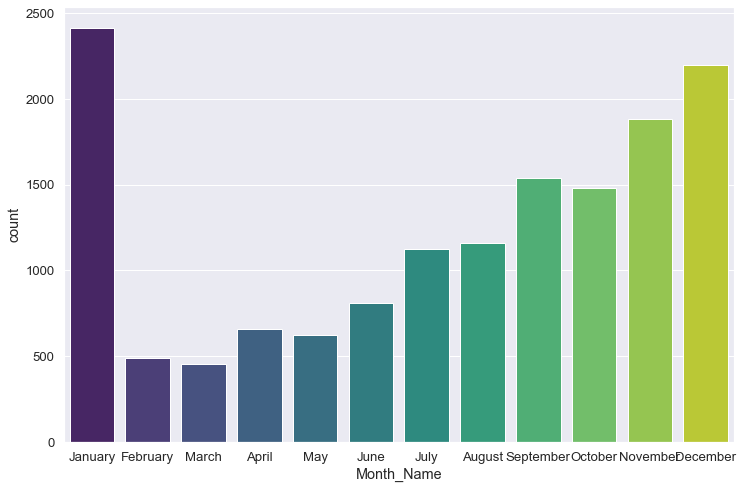

In [8]:
sns.countplot(x='Month_Name', data=df, palette='viridis')

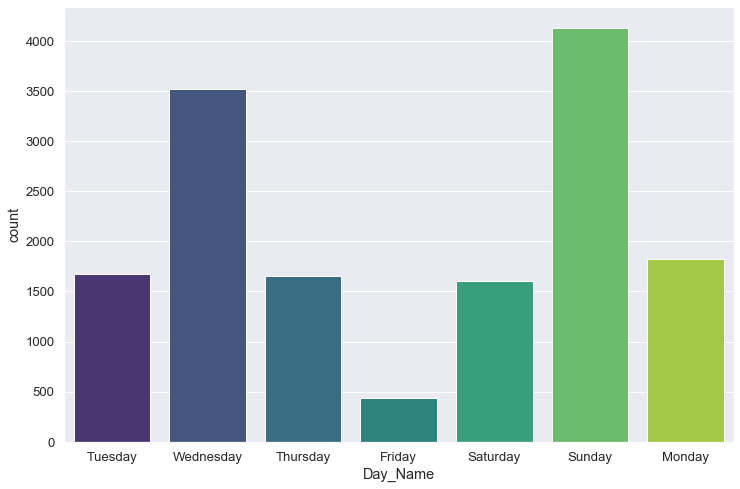

In [9]:
sns.countplot(x='Day_Name', data=df, palette='viridis')

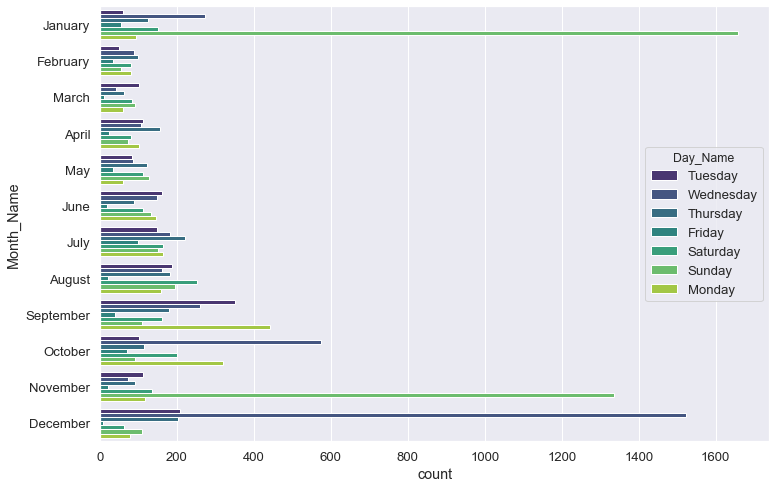

In [10]:
sns.countplot(y='Month_Name', data=df, palette='viridis', hue='Day_Name')

In [11]:
def map_months(x):
    if x in [12, 1, 2]:
        return 'Winter'
    elif x in [3, 4, 5]:
        return 'Spring'
    elif x in [6, 7, 8]:
        return 'Summer'
    elif x in [9, 10, 11]:
        return 'Autumn'

df['Season'] = df['Month'].apply(map_months)
df.head()

Time  MONEY  Year  Month  Day Month_Name Day_Name  Season
0 2019-01-01  100.0  2019      1    1    January  Tuesday  Winter
1 2019-01-01  100.0  2019      1    1    January  Tuesday  Winter
2 2019-01-01   50.0  2019      1    1    January  Tuesday  Winter
3 2019-01-01   50.0  2019      1    1    January  Tuesday  Winter
4 2019-01-01   20.0  2019      1    1    January  Tuesday  Winter

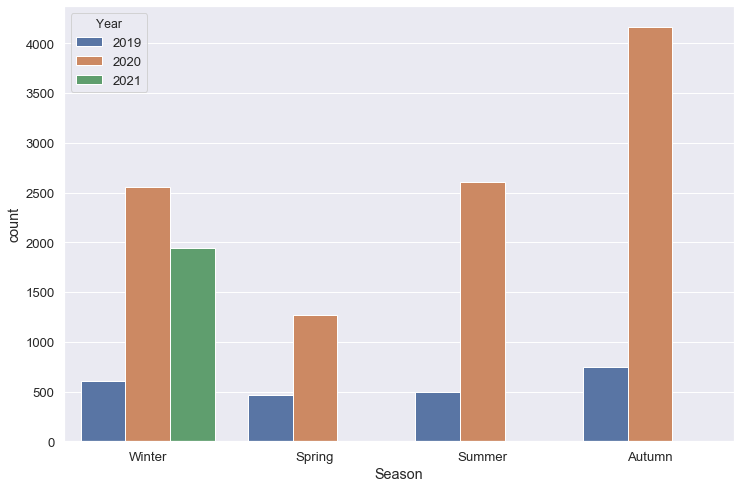

In [12]:
sns.countplot(x='Season', hue='Year', data=df)

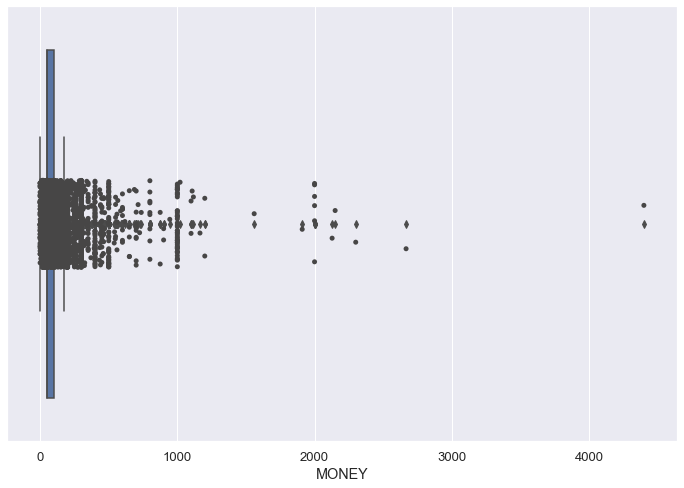

In [14]:
sns.boxplot(x='MONEY', data=df)
sns.stripplot(x='MONEY', data=df, color="#474646")

In [15]:
from datasist.structdata import detect_outliers

In [17]:
outliers_indices = detect_outliers(df, 0, ['MONEY'])
len(outliers_indices)

1337

In [18]:
df.describe()

MONEY          Year         Month           Day
count  14838.000000  14838.000000  14838.000000  14838.000000
mean      88.527960   2019.975334      7.296536     15.553916
std      117.037744      0.534133      3.851329      9.005777
min        0.000000   2019.000000      1.000000      1.000000
25%       50.000000   2020.000000      4.000000      9.000000
50%       50.000000   2020.000000      8.000000     11.000000
75%      100.000000   2020.000000     11.000000     24.000000
max     4400.000000   2021.000000     12.000000     31.000000

In [19]:
df.drop(outliers_indices, inplace=True)
df

Time  MONEY  Year  Month  Day Month_Name Day_Name  Season
0     2019-01-01  100.0  2019      1    1    January  Tuesday  Winter
1     2019-01-01  100.0  2019      1    1    January  Tuesday  Winter
2     2019-01-01   50.0  2019      1    1    January  Tuesday  Winter
3     2019-01-01   50.0  2019      1    1    January  Tuesday  Winter
4     2019-01-01   20.0  2019      1    1    January  Tuesday  Winter
...          ...    ...   ...    ...  ...        ...      ...     ...
14831 2021-02-01  100.0  2021      2    1   February   Monday  Winter
14832 2021-02-01   50.0  2021      2    1   February   Monday  Winter
14833 2021-02-01   30.0  2021      2    1   February   Monday  Winter
14834 2021-02-01   60.0  2021      2    1   February   Monday  Winter
14837 2021-02-01  100.0  2021      2    1   February   Monday  Winter

[13501 rows x 8 columns]

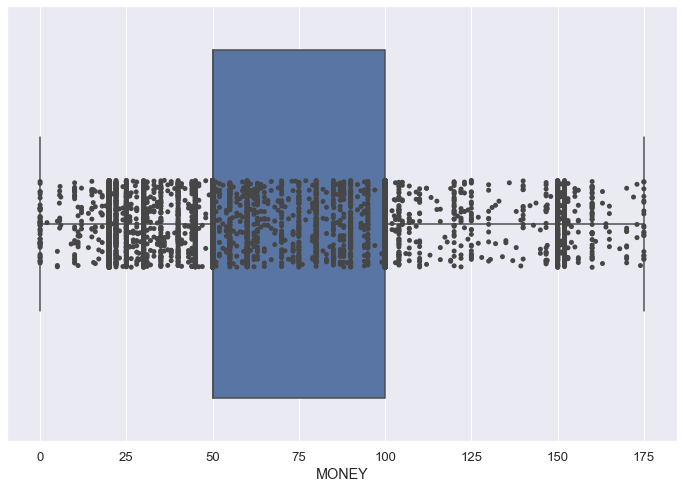

In [20]:
sns.boxplot(x='MONEY', data=df)
sns.stripplot(x='MONEY', data=df, color="#474646")

In [21]:
df_count = df.groupby('Time' ,as_index = False ).sum()
df_count.columns

Index(['Time', 'MONEY', 'Year', 'Month', 'Day'], dtype='object')

In [22]:
df_count

Time    MONEY     Year  Month    Day
0   2019-01-01    340.0    12114      6      6
1   2019-01-02    245.0    12114      6     12
2   2019-01-03     20.0     2019      1      3
3   2019-01-04     50.0     2019      1      4
4   2019-01-05    247.0     8076      4     20
..         ...      ...      ...    ...    ...
652 2021-01-10  84782.0  2532313   1253  12530
653 2021-01-20  10321.0   282940    140   2800
654 2021-01-27   1670.0    38399     19    513
655 2021-01-31   1400.0    38399     19    589
656 2021-02-01   1430.0    38399     38     19

[657 rows x 5 columns]

In [24]:
df_count.drop(['Year', 'Month', 'Day'] , axis =1 ,  inplace = True)

In [25]:
df_count['Year'] = df_count['Time'].dt.year
df_count['Month'] = df_count['Time'].dt.month
df_count['Day'] = df_count['Time'].dt.day

In [26]:
dc = df.groupby('Time' ,as_index = False ).count()

In [27]:
df_count['RechargeCount'] = dc['Month']

In [28]:
df_count

Time    MONEY  Year  Month  Day  RechargeCount
0   2019-01-01    340.0  2019      1    1              6
1   2019-01-02    245.0  2019      1    2              6
2   2019-01-03     20.0  2019      1    3              1
3   2019-01-04     50.0  2019      1    4              1
4   2019-01-05    247.0  2019      1    5              4
..         ...      ...   ...    ...  ...            ...
652 2021-01-10  84782.0  2021      1   10           1253
653 2021-01-20  10321.0  2021      1   20            140
654 2021-01-27   1670.0  2021      1   27             19
655 2021-01-31   1400.0  2021      1   31             19
656 2021-02-01   1430.0  2021      2    1             19

[657 rows x 6 columns]

In [34]:
outliers_indices = detect_outliers(df_count, 0, ['RechargeCount'])
len(outliers_indices)

45

In [36]:
df_count.drop(outliers_indices, inplace=True)
df_count

Time   MONEY  Year  Month  Day  RechargeCount
0   2019-01-01   340.0  2019      1    1              6
1   2019-01-02   245.0  2019      1    2              6
2   2019-01-03    20.0  2019      1    3              1
3   2019-01-04    50.0  2019      1    4              1
4   2019-01-05   247.0  2019      1    5              4
..         ...     ...   ...    ...  ...            ...
649 2021-01-04  1310.0  2021      1    4             20
650 2021-01-06  1275.0  2021      1    6             20
654 2021-01-27  1670.0  2021      1   27             19
655 2021-01-31  1400.0  2021      1   31             19
656 2021-02-01  1430.0  2021      2    1             19

[612 rows x 6 columns]

In [37]:
df_count.describe()

MONEY         Year       Month         Day  RechargeCount
count   612.000000   612.000000  612.000000  612.000000     612.000000
mean    678.594150  2019.483660    6.259804   15.619281      10.612745
std     574.435839     0.519405    3.447452    8.720266       8.596541
min      20.000000  2019.000000    1.000000    1.000000       1.000000
25%     237.290000  2019.000000    3.000000    8.000000       4.000000
50%     500.000000  2019.000000    6.000000   16.000000       8.000000
75%    1007.750000  2020.000000    9.000000   23.000000      15.000000
max    2497.000000  2021.000000   12.000000   31.000000      39.000000

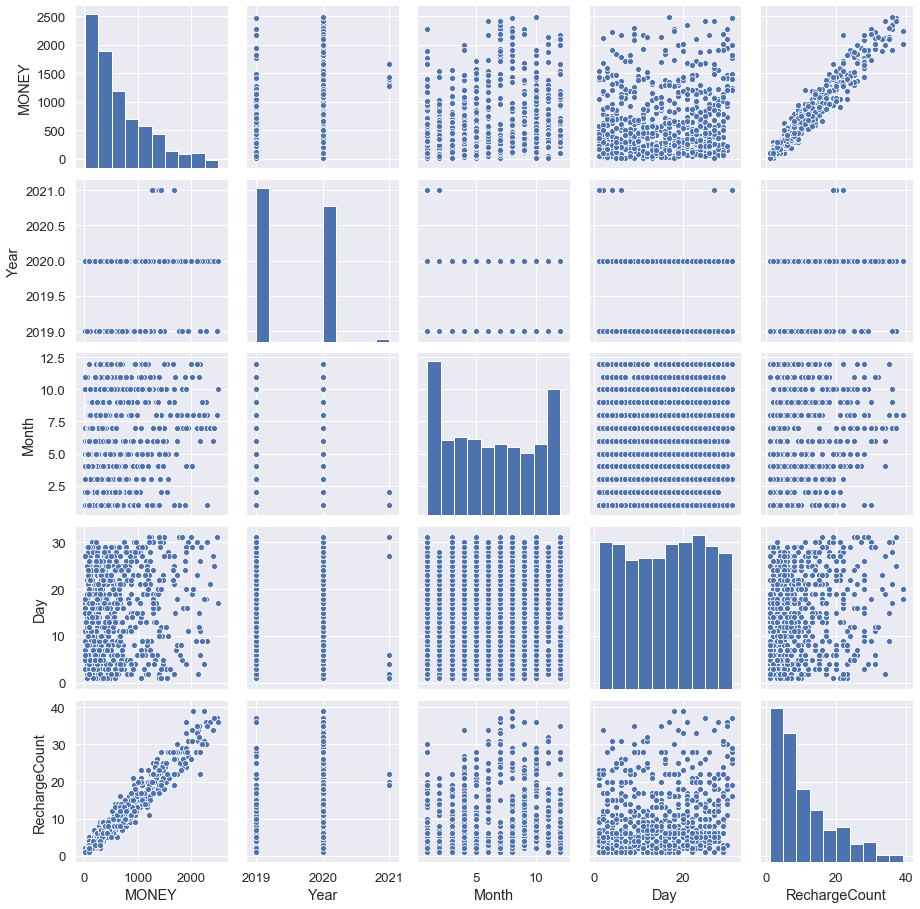

In [38]:
sns.pairplot(df_count)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
x = df_count.drop(['MONEY','Time'], axis=1)
y = df_count['MONEY']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [46]:
scaler= StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [48]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [49]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print('-'*10)

Using model: LR
Training Score: 0.9487542731530796
Test Score: 0.9448271880046336
----------
Using model: KNNR
Training Score: 0.9455607218030673
Test Score: 0.9255647419808595
----------
Using model: SVR
Training Score: 0.04575978516331847
Test Score: 0.07153509636439237
----------
Using model: DT
Training Score: 1.0
Test Score: 0.8940010981346949
----------
Using model: RF
Training Score: 0.9912606880348451
Test Score: 0.9456652946446281
----------
Using model: XGBR
Training Score: 0.9995710535349664
Test Score: 0.9386884968771301
----------


C:\MyAnaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\MyAnaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [50]:
model = RandomForestRegressor()

model.fit(x_train, y_train)

RandomForestRegressor()

In [51]:
y_pred = model.predict(x_test)
y_pred

array([ 366.9832, 1188.87  ,  837.77  , 1381.16  ,  279.915 ,  379.3173,
       1451.34  ,  506.03  , 1264.6249,  212.4797,  230.2624,  306.062 ,
        444.968 ,  542.8085, 2072.18  ,  594.9297,  350.3885,  361.1152,
       2098.12  , 1747.4368,  348.7734, 1179.51  ,  427.839 , 1198.7489,
        261.2932, 1425.69  ,  716.4156,  700.7778,  634.6   ,  450.9   ,
        194.6474,  138.089 ,  100.1966, 1266.3196,  643.19  , 2359.87  ,
       1018.1488,  469.022 ,  391.2059, 1232.38  , 2260.57  ,  892.68  ,
       1233.0232, 1023.7638,  880.5938, 2379.43  ,  505.2346,  224.0356,
        179.5132,  703.754 ,  963.3   ,  338.0966,  761.1766,  202.7909,
        143.2798, 1096.56  , 1587.31  ,  498.4282, 1172.9   ,  230.6203,
        263.75  ,  164.2866,  300.502 ,  236.5679,  870.9   ,   25.68  ,
        288.4085,  291.1168,  434.3866,  228.6898,  454.76  ,  959.5838,
        113.1434,  138.6836,  489.7928,  174.2   ,  916.9533,  355.8944,
        999.7965,  588.57  ,  144.43  ,  738.5789, 

In [52]:
y_test

278     292.0
643    1490.0
391    1079.0
489    1473.0
92      292.0
        ...  
74       70.0
116      65.0
29      100.0
604    1118.0
264     200.0
Name: MONEY, Length: 123, dtype: float64

In [53]:
x.columns

Index(['Year', 'Month', 'Day', 'RechargeCount'], dtype='object')

In [74]:
custom_data = np.array([2021, 5, 1, 12])

In [75]:
custom_data = scaler.transform([custom_data])

In [76]:
prediction = model.predict(custom_data)
prediction

array([654.6799])